<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Normalization Techniques**


Estimated time needed: **30** minutes


In this lab, you will focus on data normalization. This includes identifying compensation-related columns, applying normalization techniques, and visualizing the data distributions.


## Objectives


In this lab, you will perform the following:


- Identify duplicate rows and remove them.

- Check and handle missing values in key columns.

- Identify and normalize compensation-related columns.

- Visualize the effect of normalization techniques on data distributions.


-----


## Hands on Lab


#### Step 1: Install and Import Libraries


In [12]:
!pip install pandas

In [13]:
!pip install matplotlib
!pip install seaborn

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2: Load the Dataset into a DataFrame


We use the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.


The functions below will download the dataset into your browser:


In [15]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)

# Display the first few rows to check if data is loaded correctly
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

In [16]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")

### Section 1: Handling Duplicates
##### Task 1: Identify and remove duplicate rows.


In [17]:
## Write your code here
# Identify duplicates
# Count the number of duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows found: {duplicate_count}")

# Remove duplicates
if duplicate_count > 0:
    # Drop duplicate rows and keep the first occurrence
    df.drop_duplicates(inplace=True)
    
    # Reset the index after dropping rows to keep it continuous
    df.reset_index(drop=True, inplace=True)
    print("Duplicate rows have been removed.")
else:
    print("No duplicates to remove.")

# Verify the final shape
print(f"New dataset shape: {df.shape}")

# Save the cleaned data to a new CSV file
df.to_csv("cleaned_survey_data.csv", index=False)

Number of duplicate rows found: 0
No duplicates to remove.
New dataset shape: (65437, 114)


### Section 2: Handling Missing Values
##### Task 2: Identify missing values in `CodingActivities`.


In [18]:
## Write your code here
# Identify missing values in the CodingActivities column
missing_count = df['CodingActivities'].isnull().sum()

print(f"Number of missing values in 'CodingActivities': {missing_count}")

Number of missing values in 'CodingActivities': 10971


##### Task 3: Impute missing values in CodingActivities with forward-fill.


In [19]:
## Write your code here
# Check missing values before imputation
before_count = df['CodingActivities'].isnull().sum()
print(f"Missing values in CodingActivities before: {before_count}")

# Apply forward-fill
# This replaces NaN with the value from the previous row
df['CodingActivities'] = df['CodingActivities'].ffill()

# Check missing values after imputation
after_count = df['CodingActivities'].isnull().sum()
print(f"Missing values in CodingActivities after: {after_count}")

Missing values in CodingActivities before: 10971
Missing values in CodingActivities after: 0


**Note**:  Before normalizing ConvertedCompYearly, ensure that any missing values (NaN) in this column are handled appropriately. You can choose to either drop the rows containing NaN or replace the missing values with a suitable statistic (e.g., median or mean).


### Section 3: Normalizing Compensation Data
##### Task 4: Identify compensation-related columns, such as ConvertedCompYearly.
Normalization is commonly applied to compensation data to bring values within a comparable range. Here, you’ll identify ConvertedCompYearly or similar columns, which contain compensation information. This column will be used in the subsequent tasks for normalization.


In [20]:
## Write your code here
# Filter columns containing 'Comp'
comp_related_cols = [col for col in df.columns if 'Comp' in col]

print("Compensation-related columns found:")
print(comp_related_cols)

Compensation-related columns found:
['CompTotal', 'AIComplex', 'ConvertedCompYearly']


##### Task 5: Normalize ConvertedCompYearly using Min-Max Scaling.
Min-Max Scaling brings all values in a column to a 0-1 range, making it useful for comparing data across different scales. Here, you will apply Min-Max normalization to the ConvertedCompYearly column, creating a new column ConvertedCompYearly_MinMax with normalized values.


In [21]:
## Write your code here
# Handle missing values in the target column
# Scaling cannot be performed on NaN values. We will fill with the median.
median_val = df['ConvertedCompYearly'].median()
df['ConvertedCompYearly'] = df['ConvertedCompYearly'].fillna(median_val)

# Apply Min-Max Scaling
comp_min = df['ConvertedCompYearly'].min()
comp_max = df['ConvertedCompYearly'].max()

df['NormalizedComp'] = (df['ConvertedCompYearly'] - comp_min) / (comp_max - comp_min)

# Verify the results
print(f"Minimum value of NormalizedComp: {df['NormalizedComp'].min()}")
print(f"Maximum value of NormalizedComp: {df['NormalizedComp'].max()}")
print(df[['ConvertedCompYearly', 'NormalizedComp']].head())

Minimum value of NormalizedComp: 0.0
Maximum value of NormalizedComp: 1.0
   ConvertedCompYearly  NormalizedComp
0              65000.0        0.003998
1              65000.0        0.003998
2              65000.0        0.003998
3              65000.0        0.003998
4              65000.0        0.003998


##### Task 6: Apply Z-score Normalization to `ConvertedCompYearly`.

Z-score normalization standardizes values by converting them to a distribution with a mean of 0 and a standard deviation of 1. This method is helpful for datasets with a Gaussian (normal) distribution. Here, you’ll calculate Z-scores for the ConvertedCompYearly column, saving the results in a new column ConvertedCompYearly_Zscore.


In [22]:
## Write your code here
# Handle missing values
# We use the median to fill missing compensation values to avoid skewing the mean
median_comp = df['ConvertedCompYearly'].median()
df['ConvertedCompYearly'] = df['ConvertedCompYearly'].fillna(median_comp)

# Calculate Mean and Standard Deviation
mean_val = df['ConvertedCompYearly'].mean()
std_val = df['ConvertedCompYearly'].std()

# Apply Z-score Normalization
df['ZScoreComp'] = (df['ConvertedCompYearly'] - mean_val) / std_val

# Verify the results
print(f"Mean of normalized column (should be ~0): {df['ZScoreComp'].mean():.5f}")
print(f"Std Dev of normalized column (should be ~1): {df['ZScoreComp'].std():.5f}")
print(df[['ConvertedCompYearly', 'ZScoreComp']].head())

Mean of normalized column (should be ~0): -0.00000
Std Dev of normalized column (should be ~1): 1.00000
   ConvertedCompYearly  ZScoreComp
0              65000.0   -0.067513
1              65000.0   -0.067513
2              65000.0   -0.067513
3              65000.0   -0.067513
4              65000.0   -0.067513


### Section 4: Visualization of Normalized Data
##### Task 7: Visualize the distribution of `ConvertedCompYearly`, `ConvertedCompYearly_Normalized`, and `ConvertedCompYearly_Zscore`

Visualization helps you understand how normalization changes the data distribution. In this task, create histograms for the original ConvertedCompYearly, as well as its normalized versions (ConvertedCompYearly_MinMax and ConvertedCompYearly_Zscore). This will help you compare how each normalization technique affects the data range and distribution.


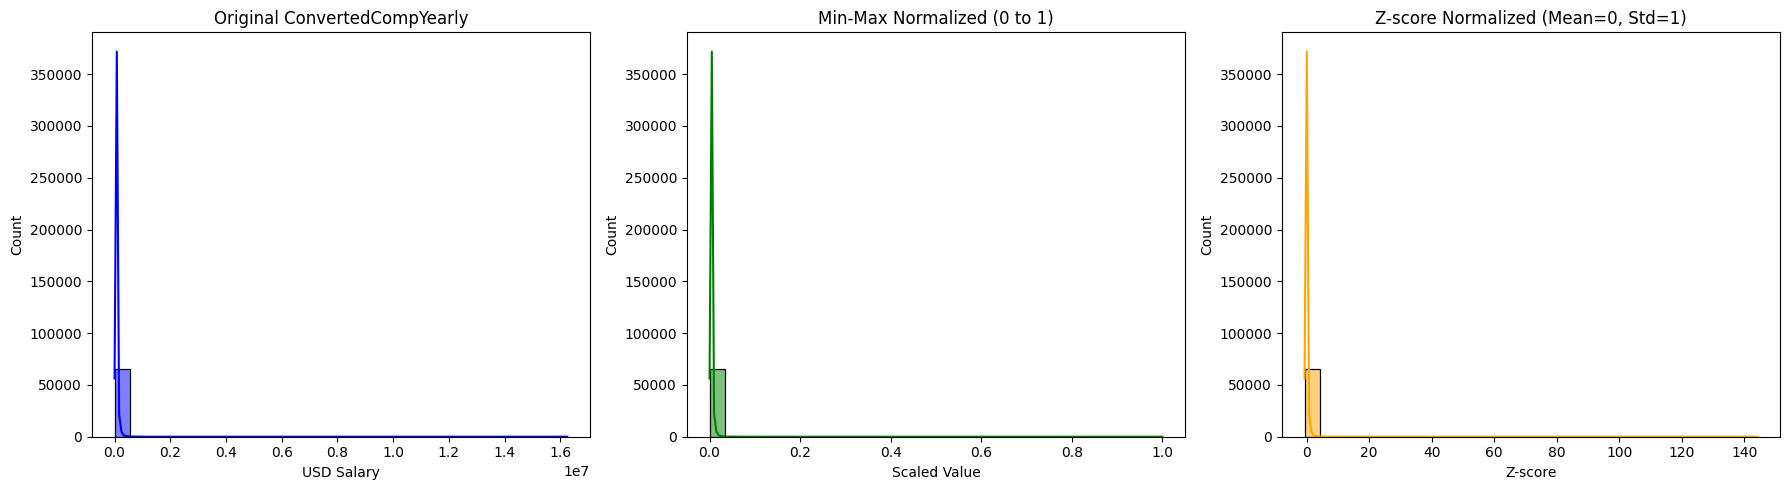

In [23]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create Normalized Column (Min-Max Scaling)
c_min = df['ConvertedCompYearly'].min()
c_max = df['ConvertedCompYearly'].max()
df['ConvertedCompYearly_Normalized'] = (df['ConvertedCompYearly'] - c_min) / (c_max - c_min)

# Create Z-score Column (Standardization)
c_mean = df['ConvertedCompYearly'].mean()
c_std = df['ConvertedCompYearly'].std()
df['ConvertedCompYearly_Zscore'] = (df['ConvertedCompYearly'] - c_mean) / c_std

# Visualization using Histograms
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot Original Data
sns.histplot(df['ConvertedCompYearly'], bins=30, kde=True, ax=axes[0], color='blue')
axes[0].set_title('Original ConvertedCompYearly')
axes[0].set_xlabel('USD Salary')

# Plot Min-Max Normalized Data
sns.histplot(df['ConvertedCompYearly_Normalized'], bins=30, kde=True, ax=axes[1], color='green')
axes[1].set_title('Min-Max Normalized (0 to 1)')
axes[1].set_xlabel('Scaled Value')

# Plot Z-score Normalized Data
sns.histplot(df['ConvertedCompYearly_Zscore'], bins=30, kde=True, ax=axes[2], color='orange')
axes[2].set_title('Z-score Normalized (Mean=0, Std=1)')
axes[2].set_xlabel('Z-score')

plt.tight_layout()
plt.savefig('compensation_distributions.png')
plt.show()

### Summary


In this lab, you practiced essential normalization techniques, including:

- Identifying and handling duplicate rows.

- Checking for and imputing missing values.

- Applying Min-Max scaling and Z-score normalization to compensation data.

- Visualizing the impact of normalization on data distribution.


Copyright © IBM Corporation. All rights reserved.
